# Se han entrenado dos modelos RandomDorest y SVM para la predicción de movimientos a partir de datos del celular

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("/content/drive/MyDrive/sensadoFisio/dataset_final_todas_caracteristicas.csv")

# Mostrar las primeras filas para verificar
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   GyroX_mean  GyroX_std  GyroX_max  GyroX_min  GyroY_mean  GyroY_std  \
0   -0.177820   0.074437    -0.0827     -0.275    0.357165   0.177207   
1   -0.136278   0.042584    -0.0827     -0.216    0.134977   0.176273   
2   -0.150738   0.033514    -0.0919     -0.216    0.178092   0.170334   
3   -0.097349   0.072124     0.0755     -0.171    0.205631   0.124151   
4    0.052609   0.127809     0.2070     -0.167   -0.029901   0.155170   

   GyroY_max  GyroY_min  GyroZ_mean  GyroZ_std  ...  AccelX_min  AccelY_mean  \
0      0.531    -0.1080    0.363520   0.088291  ...        5.53      -8.0214   
1      0.408    -0.1440    0.207332   0.113487  ...        5.53      -8.1640   
2      0.338    -0.1440    0.044239   0.065534  ...        5.57      -8.2130   
3      0.338    -0.0686   -0.063461   0.070701  ...        5.57      -8.1516   
4      0.242    -0.2050   -0.175828   0.081360  ...        5.83      -8.0776   

   AccelY_std  AccelY_max  AccelY_min  AccelZ_mean  

In [ ]:
X = df.drop("etiqueta", axis=1)


y = df["etiqueta"]

print("\nDimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


Dimensiones de X: (12176, 24)
Dimensiones de y: (12176,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas a números (ej: "rot_izquierda" → 0)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Verificar mapeo
print("\nClases originales:", encoder.classes_)
print("Etiquetas codificadas:", y_encoded[:5])



Clases originales: ['arriba' 'izquierdoArm' 'rot_derecha' 'rot_izquierda']
Etiquetas codificadas: [1 1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)


print("\nTamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (9740, 24)
Tamaño de prueba: (2436, 24)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar solo las características (no las etiquetas)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar normalización (media ≈ 0, std ≈ 1)
print("\nMedia de X_train escalado:", X_train_scaled.mean(axis=0))
print("Desviación estándar de X_train escalado:", X_train_scaled.std(axis=0))


Media de X_train escalado: [-1.27664249e-17 -2.18852999e-18 -4.92419247e-18  5.83607997e-18
  3.64754998e-18  1.53197099e-17 -5.47132497e-18 -1.96967699e-17
  4.01230498e-18  9.48362994e-17  3.64754998e-19 -3.10041748e-18
  9.95781144e-17  8.38936495e-18  1.03043287e-16  6.83915621e-17
 -4.52296197e-17 -4.59591297e-17 -2.53139968e-16 -8.60821795e-17
 -1.45901999e-18  2.11557899e-17  1.60492199e-17  7.29509996e-18]
Desviación estándar de X_train escalado: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)
print("\nPrecisión:", accuracy_score(y_test, y_pred))


Precisión: 0.909688013136289


Reporte de Clasificación - Random Forest:
               precision    recall  f1-score   support

       arriba       0.90      0.85      0.88       609
 izquierdoArm       0.85      0.90      0.88       609
  rot_derecha       0.93      0.97      0.95       609
rot_izquierda       0.96      0.92      0.94       609

     accuracy                           0.91      2436
    macro avg       0.91      0.91      0.91      2436
 weighted avg       0.91      0.91      0.91      2436



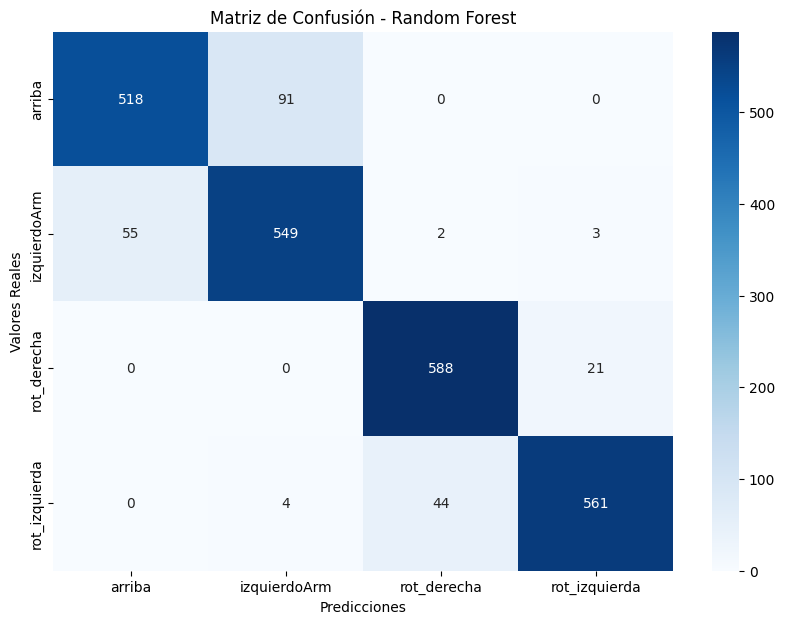

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


y_pred_rf = model.predict(X_test_scaled)
print("Reporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=encoder.classes_))


plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
          xticklabels=encoder.classes_,
          yticklabels=encoder.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


importancias = model.feature_importances_
features = X.columns
indices = np.argsort(importancias)[::-1]







In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


model_svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

model_svm.fit(X_train_scaled, y_train)


y_pred_svm = model_svm.predict(X_test_scaled)
print("\nResultados para SVM:")
print(classification_report(y_test, y_pred_svm, target_names=encoder.classes_))


Resultados para SVM:
               precision    recall  f1-score   support

       arriba       0.77      0.60      0.68       609
 izquierdoArm       0.67      0.80      0.73       609
  rot_derecha       0.81      0.93      0.86       609
rot_izquierda       0.91      0.78      0.84       609

     accuracy                           0.78      2436
    macro avg       0.79      0.78      0.78      2436
 weighted avg       0.79      0.78      0.78      2436



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores_svm = cross_val_score(
    model_svm,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring='accuracy'
)

print("\nValidación Cruzada (SVM):")
print(f"Precisión media: {scores_svm.mean():.4f} ± {scores_svm.std():.4f}")


Validación Cruzada (SVM):
Precisión media: 0.7878 ± 0.0073


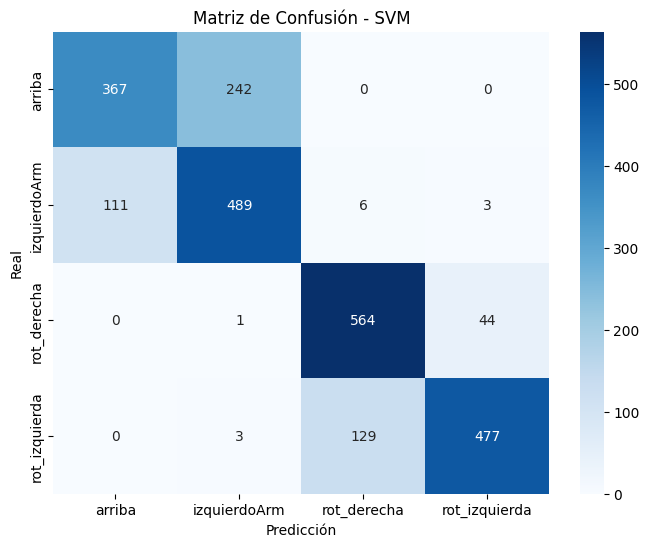

In [ ]:

cm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.show()

In [ ]:
pip install joblib

In [ ]:
from joblib import dump

# Guardar modelos
dump(model_svm, 'modelo_svmFis.joblib')
dump(model, 'modelo_rfFis.joblib')  # Asumo que "model" es el Random Forest

# Guardar componentes de preprocesamiento
dump(scaler, 'scaler.joblib')       # Objeto StandardScaler
dump(encoder, 'encoder.joblib')     # Objeto LabelEncoder

['encoder.joblib']